# VGG16

In [2]:
from keras.applications.vgg16 import VGG16, decode_predictions

In [3]:
%%time
model = VGG16()

553467904/553467096 [==============================] - 1326s 2us/step
CPU times: user 28.4 s, sys: 37.6 s, total: 1min 6s
Wall time: 22min 13s


In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

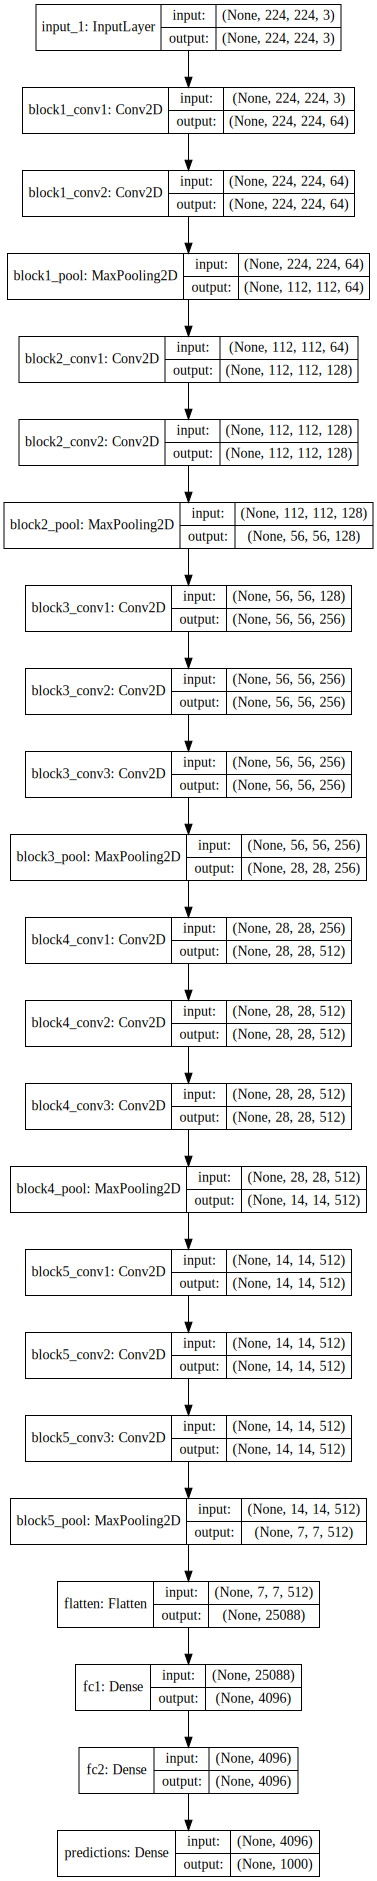

In [5]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=["accuracy"])

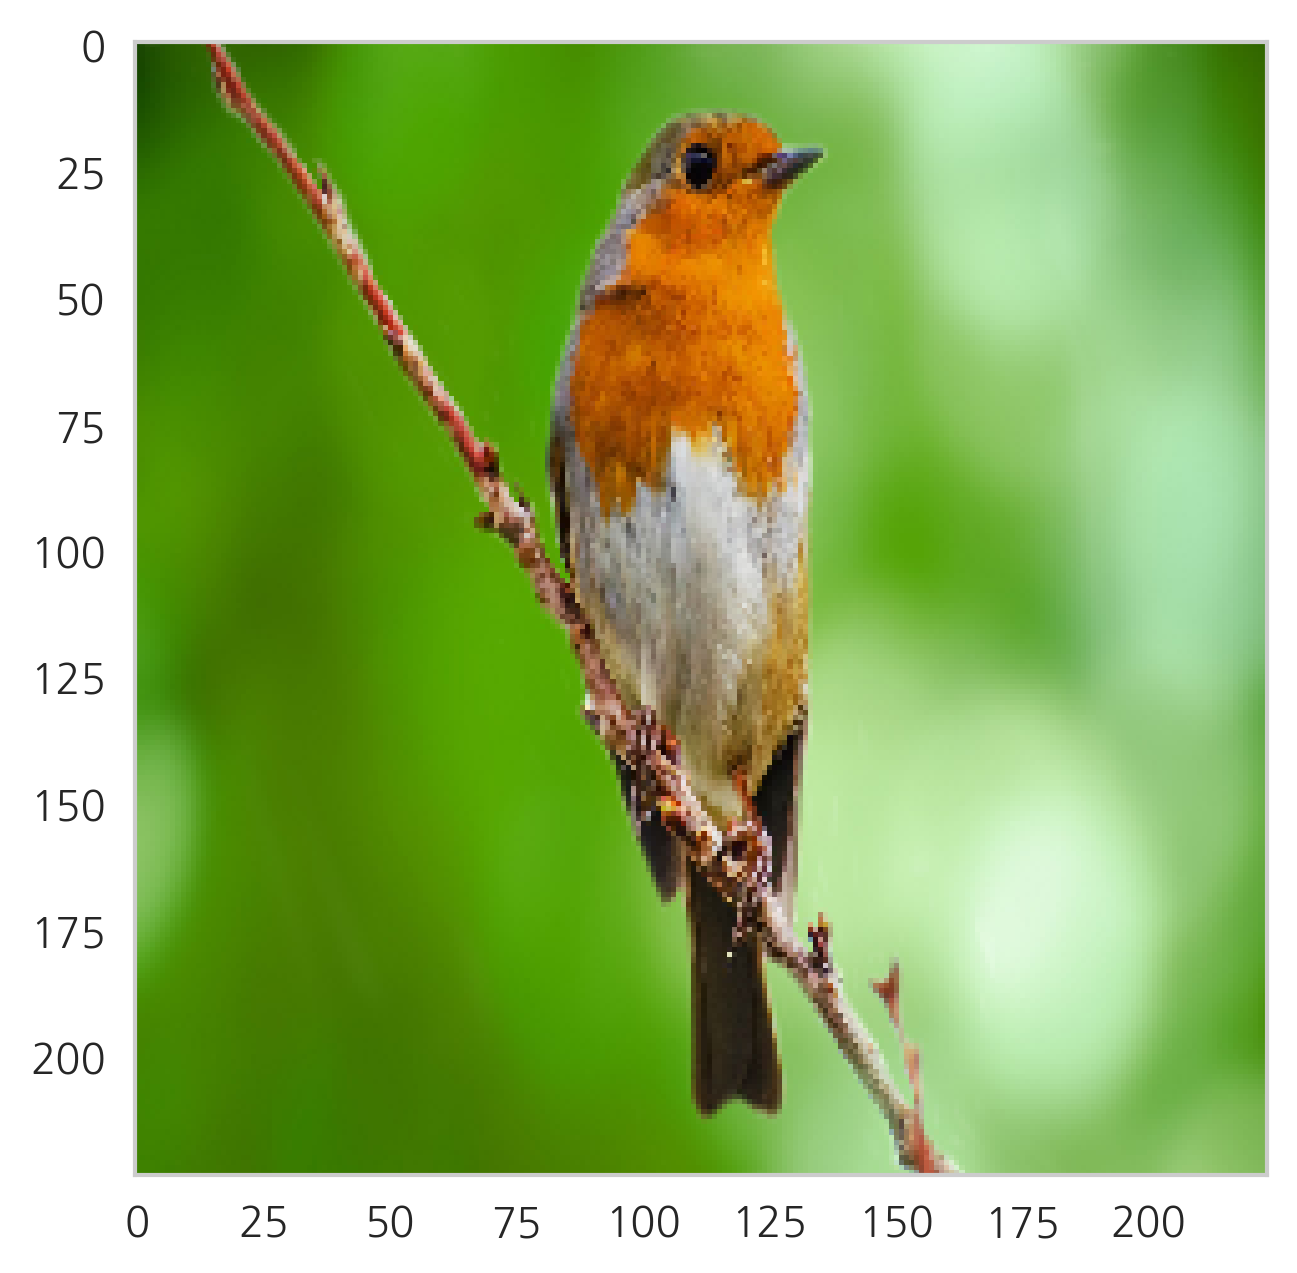

In [7]:
from PIL import Image
 
im = np.array(Image.open('bird1.jpg').resize((224, 224)))
plt.imshow(im)
plt.grid(False)

## Prediction

In [9]:
x = im[np.newaxis, :, :, :]
yhat = model.predict(x)
np.argmax(yhat)

14

In [11]:
label = decode_predictions(yhat)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

indigo_bunting (99.99%)
